# Universidad Adolfo Ibañez
## Profesor Miguel Carrasco

### Alberto Bella

## Librerías

In [25]:
# import modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import regionprops, label
from sklearn.metrics import mean_absolute_error as mae

## Lectura y procesamiento de la imagen

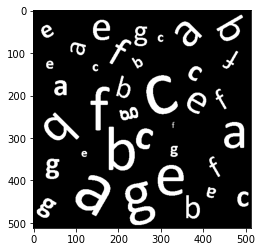

In [16]:
"""
 Universidad Adolfo Ibañez
 Facultad de Ingeniería y Ciencias
 TICS 585 - Reconocimiento de Patrones en imágenes

 Ejemplo de funcion RegionProps
 Autor:. Miguel Carrasco (26-08-2021)
 rev.1.0
"""

# read image (spanish: 'lectura de una imagen')
im = cv2.imread('sopa_letras.png')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# binarize image (spanish: 'binarizamos la imagen')
ret, bw = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY_INV)


# label each region (spanish: 'etiquetamos cada imagen')
label_bw = label(bw)

plt.figure()
plt.imshow(bw, cmap='gray')
plt.show()

## Funciones

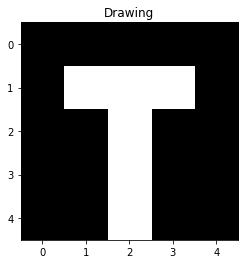

(2.0, 2.0)
[0.2777777777777778, 0.027777777777777776, 0.018518518518518517, 0.00205761316872428, 1.2701315856322716e-05]


In [61]:
# image for test
im = [[0, 0, 0, 0, 0], \
    [0, 1, 1, 1, 0], \
    [0, 0, 1, 0, 0], \
    [0, 0, 1, 0, 0], \
    [0, 0, 1, 0, 0]]

im = np.array(im)

plt.figure()
plt.title('Drawing')
plt.imshow(im, cmap='gray')
plt.show()

# ---

# moment function
def m(i, j, r, s):
    return(np.sum((i**r)*(j**s)))

# centroid
def c(i, j):
    m10 = m(i, j, 1, 0)
    m01 = m(i, j, 0, 1)
    m00 = m(i, j, 0, 0)

    return(m10/m00, m01/m00)

# central moment function
def mu(i, j, r, s, centroid):
    return(np.sum(((i - centroid[0])**r)*((j - centroid[1])**s)))

def eta(i, j, r, s, centroid):
    t = ((r+s)/2) + 1
    num = mu(i, j, r, s, centroid)
    denom = mu(i, j, 0, 0, centroid)**t
    return(num/denom)

# hu moment function
def hu_five(i, j, centroid):
    Hu = []

    hu_1 = eta(i, j, 2, 0, centroid) + eta(i, j, 0, 2, centroid)
    Hu.append(hu_1)

    hu_2 = (eta(i, j, 2, 0, centroid) - eta(i, j, 0, 2, centroid))**2 + 4*(eta(i, j, 1, 1, centroid)**2)
    Hu.append(hu_2)

    hu_3 = (eta(i, j, 3, 0, centroid) - 3*eta(i, j, 1, 2, centroid))**2 + (3*eta(i, j, 2, 1, centroid) - eta(i, j, 0, 3, centroid))**2
    Hu.append(hu_3)

    hu_4 = (eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid))**2 + (eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))**2
    Hu.append(hu_4)

    hu_5 = (eta(i, j, 3, 0, centroid) - 3*eta(i, j, 1, 2, centroid))*(eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid))* \
        ((eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid))**2 - 3*(eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))**2) + \
        (3*eta(i, j, 2, 1, centroid) - eta(i, j, 0, 3, centroid))*(eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))* \
        (3*(eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid)**2) - (eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))**2)
    Hu.append(hu_5)

    return(Hu)

# first, we select the region
region = np.argwhere(im>0)

# then, we calculate centroid
centroid = c(region[:, 0], region[:, 1])
print(centroid)

print(hu_five(region[:, 0], region[:, 1], centroid))


## Ejercicio 1: Primeros 5 Momentos de Hu

In [70]:
for prop in regionprops(label_image = label_bw):
    region = np.argwhere((prop.image*1)>0)
    # print(mae(prop.centroid, c(region[:, 0], region[:, 1])))
    # print(prop.centroid_local)
    # print(c(region[:, 0], region[:, 1]))
    
    print(prop.moments_hu)

[ 4.25377560e-01  2.59083983e-02  1.38714350e-02  7.32197520e-04
  2.33325997e-06  1.15267719e-04 -3.16479651e-08]
[ 3.37127232e-01  3.91657655e-03  9.11156124e-04  4.07496907e-04
 -1.52545279e-07 -1.94773802e-05 -1.95919819e-07]
[ 3.63249523e-01  1.18553511e-02  2.18077596e-03  4.49352558e-04
 -3.64355510e-07 -2.26743959e-05 -2.55170061e-07]
[ 2.57982079e-01  1.65783329e-03  2.75748642e-04  1.60570794e-04
 -1.28630838e-08 -4.62213578e-06 -3.12432182e-08]
[ 3.64220003e-01  3.21579122e-02  1.11669725e-03  1.60693844e-04
 -6.66787291e-08 -2.30884698e-05  1.37004809e-08]
[ 2.92098496e-01  1.03194829e-02  2.51815763e-03  8.52065067e-04
 -1.24810349e-06 -8.65569070e-05  0.00000000e+00]
[ 5.33992185e-01  2.13338649e-01  2.52214336e-02  8.09498532e-03
  1.03718430e-04  2.79935714e-03 -5.11987508e-05]
[ 3.54089893e-01  1.06604287e-02  2.15554955e-03  5.52896526e-04
 -4.24355652e-07 -2.28635293e-05 -4.29240960e-07]
[ 5.35180600e-01  2.13728248e-01  2.59328202e-02  8.52346078e-03
  1.14772181e-0